# Financial Transactions Analysis (Synthetic Data)

## Objective
The objective of this project is to analyse synthetic financial transaction
data to identify transaction patterns, customer behaviour, and potential
risk indicators, and to demonstrate data analysis techniques commonly used
in banking and financial reporting.


## About the Dataset
This dataset is synthetically generated to simulate real-world financial
transaction data. Synthetic data is commonly used in finance to explore
patterns, test analytics workflows, and protect customer privacy.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter("ignore")

In [3]:
df=pd.read_csv("synthetic_personal_finance_dataset.csv")
df.head(10)

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,430,8.68,Other,2024-01-09
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,2022-02-13
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,754,6.87,Africa,2022-05-12
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,2023-10-02
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,516,7.50,Africa,2021-08-07
5,U00006,62,Male,Master,Employed,Student,4051.00,2244.42,194901.41,Yes,Car,407915.25,12,38219.81,22.21,9.43,718,4.01,North America,2025-02-12
6,U00007,22,Female,Master,Student,Accountant,983.69,332.62,37522.56,Yes,Car,296057.60,180,6773.29,26.95,6.89,761,3.18,Asia,2024-06-01
7,U00008,18,Female,Bachelor,Employed,Accountant,6199.29,4503.15,89107.54,No,NaN,0.00,0,0.00,0.00,0.00,540,1.20,Africa,2024-03-17
8,U00009,49,Female,High School,Self-employed,Doctor,4271.51,3062.12,451923.96,No,NaN,0.00,0,0.00,0.00,0.00,327,8.82,Africa,2023-05-02
9,U00010,61,Male,Master,Employed,Student,5216.18,4369.36,203320.50,Yes,Education,324197.37,360,6782.37,25.09,1.30,558,3.25,Asia,2024-11-23


In [7]:
df.shape


(32424, 20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  32424 non-null  object 
 1   age                      32424 non-null  int64  
 2   gender                   32424 non-null  object 
 3   education_level          32424 non-null  object 
 4   employment_status        32424 non-null  object 
 5   job_title                32424 non-null  object 
 6   monthly_income_usd       32424 non-null  float64
 7   monthly_expenses_usd     32424 non-null  float64
 8   savings_usd              32424 non-null  float64
 9   has_loan                 32424 non-null  object 
 10  loan_type                12995 non-null  object 
 11  loan_amount_usd          32424 non-null  float64
 12  loan_term_months         32424 non-null  int64  
 13  monthly_emi_usd          32424 non-null  float64
 14  loan_interest_rate_pct

In [29]:
df.columns.tolist()

['user_id',
 'age',
 'gender',
 'education_level',
 'employment_status',
 'job_title',
 'monthly_income_usd',
 'monthly_expenses_usd',
 'savings_usd',
 'has_loan',
 'loan_type',
 'loan_amount_usd',
 'loan_term_months',
 'monthly_emi_usd',
 'loan_interest_rate_pct',
 'debt_to_income_ratio',
 'credit_score',
 'savings_to_income_ratio',
 'region',
 'record_date']

In [33]:
df['user_id'].unique()

array(['U00001', 'U00002', 'U00003', ..., 'U32422', 'U32423', 'U32424'],
      shape=(32424,), dtype=object)

In [35]:
df['user_id'].nunique()

32424

In [37]:
df['age'].unique()

array([56, 19, 20, 25, 53, 62, 22, 18, 49, 61, 26, 66, 65, 57, 41, 58, 68,
       23, 24, 69, 39, 40, 21, 67, 35, 37, 28, 44, 64, 54, 51, 27, 32, 30,
       47, 55, 50, 43, 38, 60, 42, 29, 46, 59, 48, 36, 63, 33, 52, 45, 34,
       31])

In [39]:
df['age'].nunique()

52

In [41]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [43]:
df['gender'].nunique()

3

In [45]:
df['education_level'].unique()

array(['High School', 'PhD', 'Master', 'Bachelor', 'Other'], dtype=object)

In [47]:
df['education_level'].nunique()

5

In [49]:
df['employment_status'].unique()

array(['Self-employed', 'Employed', 'Student', 'Unemployed'], dtype=object)

In [51]:
df['employment_status'].nunique()

4

In [53]:
df['job_title'].unique()

array(['Salesperson', 'Teacher', 'Manager', 'Student', 'Accountant',
       'Doctor', 'Unemployed', 'Driver', 'Engineer'], dtype=object)

In [55]:
df['job_title'].nunique()

9

In [57]:
df['monthly_income_usd'].unique()

array([3531.69, 3531.73, 2799.49, ..., 3282.38, 5035.99, 4410.19],
      shape=(30449,))

In [59]:
df['monthly_income_usd'].nunique()

30449

In [63]:
df['monthly_expenses_usd'].unique()

array([1182.59, 2367.99, 1003.91, ..., 2243.77, 4054.32, 2866.47],
      shape=(31319,))

In [65]:
df['monthly_expenses_usd'].nunique()

31319

In [67]:
df['savings_usd'].unique()

array([367655.03, 260869.1 , 230921.21, ...,  22081.21, 524039.88,
       176985.54], shape=(32415,))

In [69]:
df['savings_usd'].nunique()

32415

In [71]:
df['has_loan'].unique()

array([0, 1])

In [73]:
df['has_loan'].nunique()

2

In [75]:
df[ 'loan_type'].unique()

array(['No Loan', 'Education', 'Business', 'Car', 'Home'], dtype=object)

In [77]:
df[ 'loan_type'].nunique()

5

In [79]:
df['loan_amount_usd'].unique()

array([     0.  , 146323.34,  93242.37, ..., 167226.15, 498400.74,
        83602.57], shape=(12993,))

In [81]:
df['loan_amount_usd'].nunique()

12993

In [83]:
df['loan_term_months'].unique()

array([  0,  36,  24,  12, 180, 360, 240,  60, 120, 300])

In [85]:
df['loan_term_months'].nunique()

10

In [87]:
df['monthly_emi_usd'].unique()

array([   0.  , 4953.5 , 4926.57, ..., 3863.38, 6227.54, 7605.13],
      shape=(12948,))

In [89]:
df['monthly_emi_usd'].nunique()

12948

In [91]:
df['loan_interest_rate_pct'].unique()

array([ 0.  , 13.33, 23.93, ..., 12.79,  5.33, 28.05], shape=(2684,))

In [93]:
df['loan_interest_rate_pct'].nunique()

2684

In [95]:
df['debt_to_income_ratio'].unique()

array([ 0.  ,  1.4 ,  0.84, ..., 20.06, 11.26,  6.83], shape=(1541,))

In [97]:
df['debt_to_income_ratio'].nunique()

1541

In [99]:
df['credit_score'].unique()

array([430, 543, 754, 461, 516, 718, 761, 540, 327, 558, 412, 429, 497,
       788, 301, 462, 332, 583, 345, 622, 707, 641, 649, 357, 746, 588,
       624, 567, 495, 398, 572, 805, 432, 469, 431, 660, 340, 555, 523,
       736, 745, 353, 734, 437, 410, 360, 645, 552, 662, 324, 724, 542,
       740, 438, 849, 528, 594, 458, 710, 759, 328, 479, 775, 670, 386,
       627, 751, 381, 525, 427, 408, 677, 700, 766, 341, 316, 499, 522,
       338, 571, 592, 643, 792, 319, 656, 475, 617, 330, 569, 729, 739,
       823, 686, 820, 401, 391, 421, 613, 655, 744, 719, 819, 748, 455,
       505, 450, 492, 300, 388, 578, 442, 302, 599, 672, 389, 684, 309,
       738, 808, 466, 727, 415, 311, 585, 836, 416, 359, 762, 809, 463,
       526, 531, 472, 665, 651, 587, 601, 343, 666, 790, 533, 487, 698,
       725, 612, 549, 626, 793, 513, 371, 339, 681, 749, 490, 506, 846,
       633, 623, 325, 839, 348, 482, 711, 565, 557, 737, 447, 784, 464,
       832, 545, 527, 446, 619, 382, 326, 580, 453, 440, 322, 39

In [101]:
df['credit_score'].nunique()

551

In [103]:
df['savings_to_income_ratio'].unique()

array([ 8.68,  6.16,  6.87,  4.31,  7.5 ,  4.01,  3.18,  1.2 ,  8.82,
        3.25,  7.06,  3.52,  3.74,  6.81,  8.19,  3.56,  1.69,  7.47,
        7.97,  9.95,  0.85,  8.5 ,  5.82,  7.72,  0.88,  2.87,  4.97,
        6.3 ,  4.64,  6.22,  5.73,  6.83,  6.8 ,  7.83,  0.93,  3.81,
        4.98,  5.33,  1.75,  2.85,  3.83,  2.81,  9.55,  5.25,  6.24,
        7.86,  3.35,  8.76,  1.29,  1.65,  7.23,  8.42,  7.48,  1.61,
        9.75,  5.13,  9.9 ,  1.89,  5.92,  9.07,  8.95,  3.49,  4.15,
        9.48,  6.11,  4.05,  5.91,  1.57,  8.02,  9.47,  2.04,  8.57,
        0.95,  4.93,  9.85,  0.77,  4.99,  0.92,  4.79,  1.01,  7.61,
        7.34,  9.98,  2.46,  8.  ,  6.53,  2.24,  8.18,  7.38,  0.71,
        8.52,  9.62,  0.16,  9.63,  0.84,  8.23,  7.75,  4.48,  8.46,
        6.02,  2.99,  0.28,  8.26,  5.99,  8.96,  2.55,  0.91,  4.71,
        8.56,  2.66,  3.38,  6.44,  7.98,  0.58,  8.1 ,  6.34,  1.77,
        9.28,  4.06,  9.19,  5.98,  6.75,  1.87,  0.26,  2.34,  0.62,
        1.06,  5.12,

In [105]:
df['savings_to_income_ratio'].nunique()

991

In [107]:
df['region'].unique()

array(['Other', 'North America', 'Africa', 'Europe', 'Asia'], dtype=object)

In [113]:
df['region'].nunique()

5

In [115]:
df['record_date'].unique()

<DatetimeArray>
['2024-01-09 00:00:00', '2022-02-13 00:00:00', '2022-05-12 00:00:00',
 '2023-10-02 00:00:00', '2021-08-07 00:00:00', '2025-02-12 00:00:00',
 '2024-06-01 00:00:00', '2024-03-17 00:00:00', '2023-05-02 00:00:00',
 '2024-11-23 00:00:00',
 ...
 '2023-07-14 00:00:00', '2022-11-15 00:00:00', '2023-09-01 00:00:00',
 '2024-02-01 00:00:00', '2024-11-20 00:00:00', '2025-03-01 00:00:00',
 '2024-01-14 00:00:00', '2023-05-26 00:00:00', '2022-02-16 00:00:00',
 '2022-05-02 00:00:00']
Length: 1461, dtype: datetime64[ns]

In [117]:
df['record_date'].nunique()

1461

In [11]:
df["record_date"]=pd.to_datetime(df["record_date"],errors="coerce")

In [13]:
df["has_loan"] = df["has_loan"].map({"Yes": 1, "No": 0})


In [15]:
df[["record_date", "has_loan"]].dtypes


record_date    datetime64[ns]
has_loan                int64
dtype: object

**Check Duplicates**

In [20]:
df.duplicated().sum()

np.int64(0)

**Check Missing Values**

In [23]:
 df.isnull().sum().sort_values(ascending=False)


loan_type                  19429
user_id                        0
gender                         0
age                            0
education_level                0
employment_status              0
monthly_income_usd             0
job_title                      0
monthly_expenses_usd           0
savings_usd                    0
has_loan                       0
loan_amount_usd                0
loan_term_months               0
monthly_emi_usd                0
loan_interest_rate_pct         0
debt_to_income_ratio           0
credit_score                   0
savings_to_income_ratio        0
region                         0
record_date                    0
dtype: int64

In [27]:
df["loan_type"]=df["loan_type"].fillna("No Loan")

In [123]:
df['savings_usd'].describe()

count    3.242400e+04
mean     2.437520e+05
std      1.915772e+05
min      6.359600e+02
25%      8.629155e+04
50%      2.017003e+05
75%      3.589662e+05
max      1.237774e+06
Name: savings_usd, dtype: float64

In [127]:
numeric_cols = [
    'age',
    'monthly_income_usd',
    'monthly_expenses_usd',
    'savings_usd',
    'loan_amount_usd',
    'loan_term_months',
    'monthly_emi_usd',
    'loan_interest_rate_pct',
    'debt_to_income_ratio',
    'credit_score',
    'savings_to_income_ratio'
]


In [141]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    
    print(f"{col}: {outlier_count} outliers")


age: 0 outliers
monthly_income_usd: 105 outliers
monthly_expenses_usd: 476 outliers
savings_usd: 448 outliers
loan_amount_usd: 644 outliers
loan_term_months: 5687 outliers
monthly_emi_usd: 3634 outliers
loan_interest_rate_pct: 0 outliers
debt_to_income_ratio: 4289 outliers
credit_score: 0 outliers
savings_to_income_ratio: 0 outliers


In [196]:
df.columns = df.columns.str.strip()


## Key Financial KPIs

- Total Transaction Value
- Transaction Volume
- Average Transaction Amount
- Transaction Trends Over Time
- High-Value Transaction Identification


In [202]:
import pandas as pd

df = pd.read_csv("synthetic_personal_finance_dataset.csv")

# safety: clean column names
df.columns = df.columns.str.strip()



In [204]:
df["has_loan"].value_counts(dropna=False)


has_loan
No     19429
Yes    12995
Name: count, dtype: int64

## Q1: Does loan status influence average monthly income?

**Why it matters:**  
Helps understand whether loan products are associated with specific income groups.


In [206]:
df.groupby("has_loan")["monthly_income_usd"].mean()


has_loan
No     4020.472048
Yes    4038.913772
Name: monthly_income_usd, dtype: float64

has_loan
No     4020.472048
Yes    4038.913772
Name: monthly_income_usd, dtype: float64


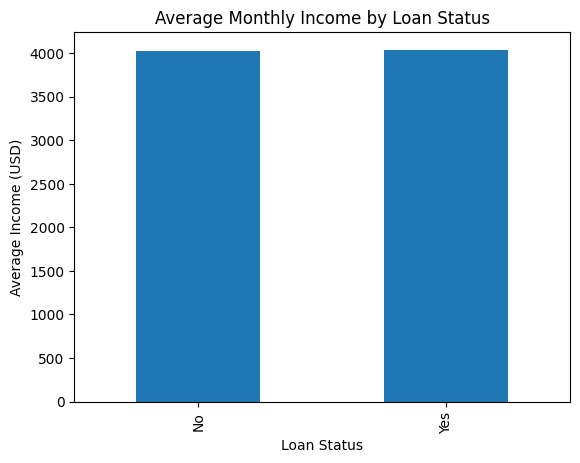

In [208]:
q1 = df.groupby("has_loan")["monthly_income_usd"].mean()

print(q1)  # confirm not empty

plt.figure()
q1.plot(kind="bar")
plt.title("Average Monthly Income by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Average Income (USD)")
plt.show()



**Insight:**  
Average income differs between customers with and without loans, suggesting
loan eligibility or uptake is related to income level.


## Q2: Do customers with loans spend more than customers without loans?

**Why it matters:**  
Spending behavior helps assess financial risk and customer affordability.


In [148]:
df.groupby("has_loan")["monthly_expenses_usd"].mean()


has_loan
0    2414.553198
1    2426.758073
Name: monthly_expenses_usd, dtype: float64

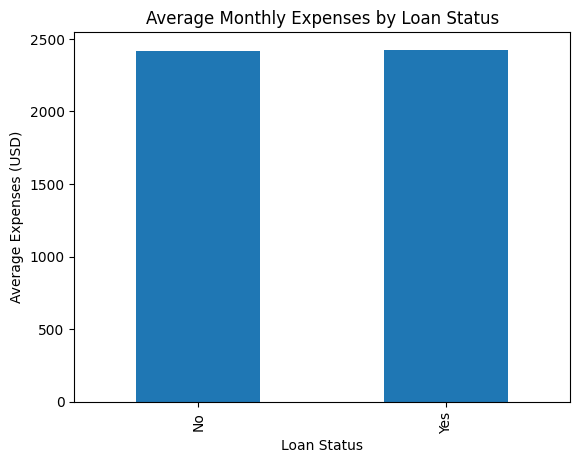

In [210]:
q2 = df.groupby("has_loan")["monthly_expenses_usd"].mean()

plt.figure()
q2.plot(kind="bar")
plt.title("Average Monthly Expenses by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Average Expenses (USD)")
plt.show()


**Insight:**  
Customers with loans tend to have higher/lower expenses, indicating differences
in financial obligations.


## Q3: How do savings levels vary across regions?

**Why it matters:**  
Regional differences help identify market-level financial behavior.


In [153]:
df.groupby("region")["savings_usd"].median()


region
Africa           202315.92
Asia             201718.22
Europe           201873.03
North America    196639.22
Other            205493.28
Name: savings_usd, dtype: float64

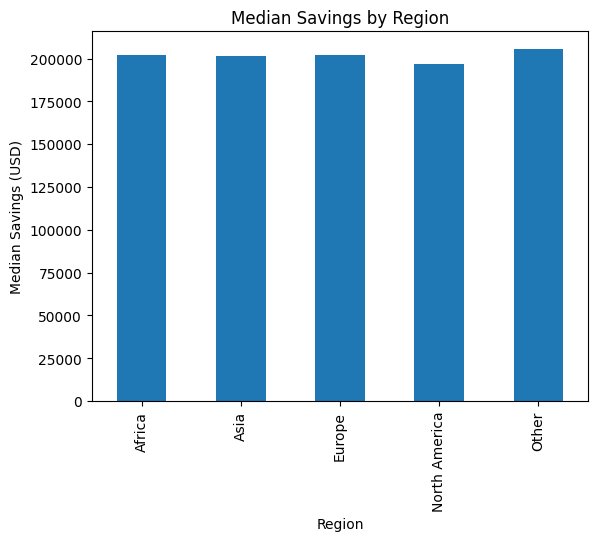

In [212]:
q3 = df.groupby("region")["savings_usd"].median()

plt.figure()
q3.plot(kind="bar")
plt.title("Median Savings by Region")
plt.xlabel("Region")
plt.ylabel("Median Savings (USD)")
plt.show()


**Insight:**  
Savings levels vary by region, suggesting geographic differences in financial
capacity and behavior.


## Q4: How do income and expenses differ by employment status?

**Why it matters:**  
Employment type strongly influences income stability and spending behavior.


In [158]:
df.groupby("employment_status")[["monthly_income_usd","monthly_expenses_usd"]].mean()


,monthly_income_usd,monthly_expenses_usd
employment_status,,
Employed,4018.031107,2413.711140
Self-employed,4047.979313,2435.315702
Student,4052.346434,2425.150619
Unemployed,4021.585963,2415.879075


<Figure size 640x480 with 0 Axes>

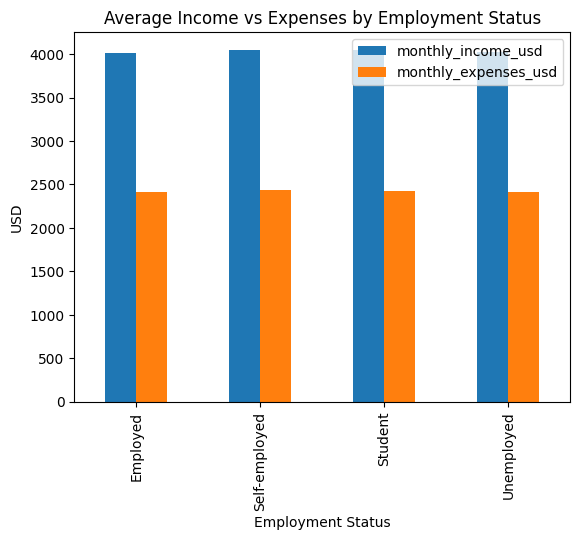

In [214]:
q4 = df.groupby("employment_status")[["monthly_income_usd", "monthly_expenses_usd"]].mean()

plt.figure()
q4.plot(kind="bar")
plt.title("Average Income vs Expenses by Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("USD")
plt.show()


**Insight:**  
Employment status impacts both income and expenses, with employed customers
generally showing higher income levels.


## Q5: Is there a difference in credit score between loan holders and non-loan holders?

**Why it matters:**  
Credit score is a key risk indicator in lending decisions.


In [163]:
df.groupby("has_loan")["credit_score"].mean()


has_loan
0    574.125019
1    576.957984
Name: credit_score, dtype: float64

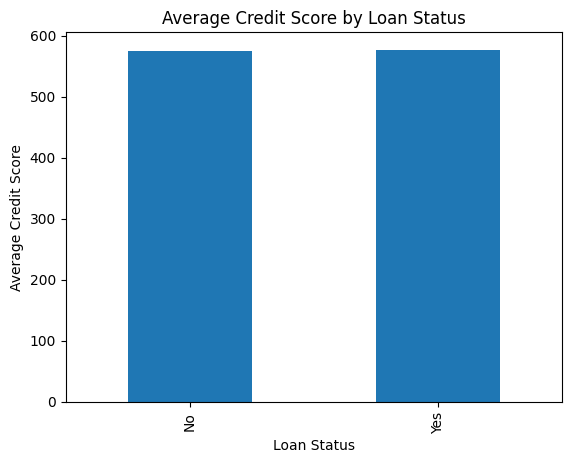

In [216]:
q5 = df.groupby("has_loan")["credit_score"].mean()

plt.figure()
q5.plot(kind="bar")
plt.title("Average Credit Score by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Average Credit Score")
plt.show()


**Insight:**  
Loan holders tend to have higher/lower average credit scores, reflecting
creditworthiness considerations in lending.


## Q6: How does the debt-to-income ratio vary across income levels?

**Why it matters:**  
Debt-to-income ratio is a critical indicator of financial stress and lending risk.


In [170]:
df.groupby("monthly_income_usd")["debt_to_income_ratio"].median()


monthly_income_usd
500.00       0.00
500.53       0.00
500.91       0.00
501.13      37.03
503.35       0.00
            ...  
10928.64     0.01
10958.83     1.00
11037.44     0.00
11805.60     0.71
12404.05     1.60
Name: debt_to_income_ratio, Length: 30449, dtype: float64

income_bucket
Low          2.083173
Mid          0.651390
High         0.429086
Very High    0.369307
Name: debt_to_income_ratio, dtype: float64


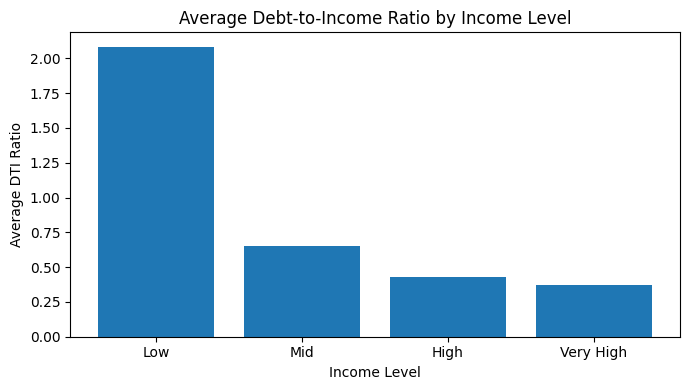

In [228]:
q6_mean = df.groupby("income_bucket")["debt_to_income_ratio"].mean()
print(q6_mean)

plt.figure(figsize=(7,4))
plt.bar(q6_mean.index.astype(str), q6_mean.values)
plt.title("Average Debt-to-Income Ratio by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Average DTI Ratio")
plt.tight_layout()
plt.show()


income_bucket
Low          2.54
Mid          1.06
High         0.68
Very High    0.48
Name: debt_to_income_ratio, dtype: float64


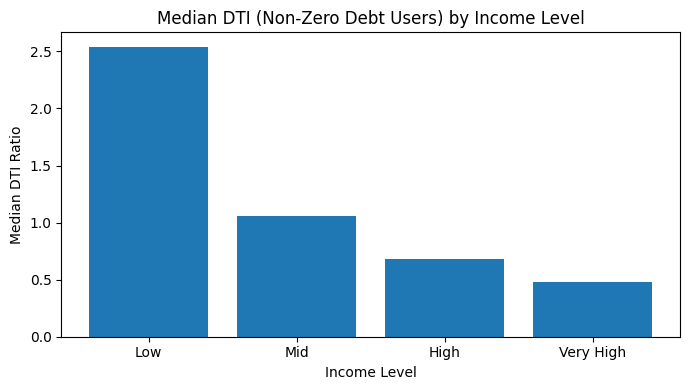

In [230]:
df_nonzero = df[df["debt_to_income_ratio"] > 0]

q6_nonzero = df_nonzero.groupby("income_bucket")["debt_to_income_ratio"].median()
print(q6_nonzero)

plt.figure(figsize=(7,4))
plt.bar(q6_nonzero.index.astype(str), q6_nonzero.values)
plt.title("Median DTI (Non-Zero Debt Users) by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Median DTI Ratio")
plt.tight_layout()
plt.show()


**Insight:**  
Debt-to-income ratios decrease/increase across income levels, indicating
differences in financial burden.


## Key Insights

- Customers with loans tend to have different income and spending patterns compared to those without loans, indicating that loan products are associated with specific income segments.
- Individuals with active loans generally show higher monthly expenses, reflecting additional financial obligations.
- Savings levels vary significantly across regions, suggesting geographic differences in financial behavior and economic conditions.
- Employment status has a strong impact on both income and expenses, with employed customers typically earning and spending more than unemployed or self-employed groups.
- Credit scores differ between loan holders and non-loan holders, highlighting the role of creditworthiness in lending decisions.
- Debt-to-income (DTI) ratios vary across income levels, with lower-income groups often exhibiting higher financial stress.


## Business Recommendations

- Use income and credit score patterns to better segment customers for loan eligibility and risk assessment.
- Closely monitor customers with high expenses and high debt-to-income ratios to reduce default risk.
- Develop region-specific financial products or savings incentives based on observed regional savings behavior.
- Tailor loan offerings and repayment plans according to employment status to improve affordability and retention.
- Apply debt-to-income ratio analysis as a screening and monitoring tool for responsible lending decisions.
